In [3]:
using InvariantMeasures

In [4]:
?PwMap

search: PwMap norms_of_powers_from_coarser_grid



Dynamic based on a piecewise monotonic map.

The map is defined as T(x) = Ts[k](x) if x ∈ [endpoints[k], endpoints[k+1]).

`y_endpoints` (kx2 matrix) contains the result of applying Ts to the endpoints of each interval. These can be filled in automatically from `endpoints`, but sometimes they are known to higher accuracy, for instance for `x -> mod(3x, 1)` we know that it is full-branch exactly.

---

Function call, and Taylor expansion, of a PwMap. Note that this ignores discontinuities; users are free to shoot themselves in the foot and call this on a non-smooth piecewise map. No better solutions for now.


In [44]:
struct UnimodalMap <: Dynamic
    D::PwMap
    α::Interval 
end

UnimodalMap(α::Real) = UnimodalMap(PwMap([x->1-2^α*(0.5-x)^α, x->1-2^α*(x-0.5)^α], 
                                         [Interval(0), Interval(0.5), Interval(1)], 
                                         [0 1;
                                          0 1]), Interval(α))

InvariantMeasures.DynamicDefinition.nbranches(D::UnimodalMap) = 2


In [6]:
D = UnimodalMap(3)

UnimodalMap(Piecewise-defined dynamic with 2 branches, [3, 3])

In [9]:
using Plots

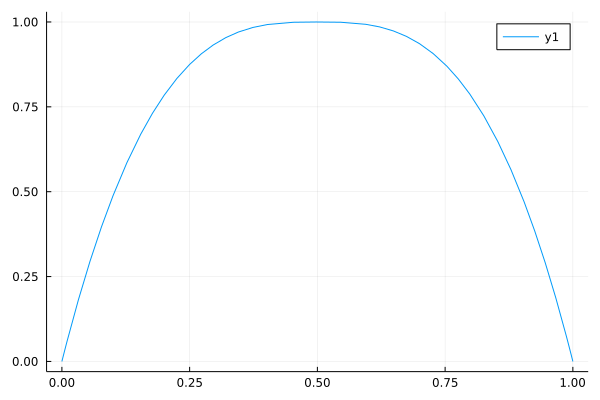

In [10]:
plot(D.D, 0, 1) 
# remark that I'm plotting the PwMap which is a member of D to make this more elegant I would need to define a plot recipe for UnimodalMap

In [11]:
B = Ulam(16)

Ulam{LinRange{Float64}}(range(0.0, stop=1.0, length=17))

In [12]:
Q = DiscretizedOperator(B, D.D)

┌ Info: Maximum iterates reached
│   max_iter = 100
└ @ InvariantMeasures.Contractors /home/isaia/.julia/packages/InvariantMeasures/yB7qO/src/Contractors.jl:68


IntegralPreservingDiscretizedOperator{SparseArrays.SparseMatrixCSC{Interval{Float64}, Int64}}(
⡇⠀⠀⠀⠀⠀⠀⢸
⢳⠀⠀⠀⠀⠀⠀⡞
⠘⡆⠀⠀⠀⠀⢰⠃
⠀⠙⣆⣀⡀⢠⣏⣀)

As you can see, the PwMap type does not behave well with unimodal maps, because of the zero in the derivative. While this is going to be corrected in the assembler, I will show you how this is possible to be solved through Julia multiple dispatch.
This is nice to know, since it makes possible to extend the package without having to speak with the developers or know the intricacies of the implementation.
The question is that, since there are some points where the derivative is $0$, this leads to problems in computing the preimages.

In [48]:
# this is going to be a simplified version of the preimage routine, since the definition of the map is really 
# simple, for more complicated functions, more general methods need to be defined, as in the code
# since our map has an explicit inverse function we do not even need to use the Newton method

function InvariantMeasures.DynamicDefinition.preim(D::UnimodalMap, k, y, ϵ)
    exp = 1/D.α
    if k == 1
        return (1-(1-y)^exp)/2
    elseif k == 2
        return (1+(1-y)^exp)/2
    end
end

In [49]:
Q = DiscretizedOperator(B, D)

IntegralPreservingDiscretizedOperator{SparseArrays.SparseMatrixCSC{Interval{Float64}, Int64}}(
⡇⠀⠀⠀⠀⠀⠀⢸
⢳⠀⠀⠀⠀⠀⠀⡞
⠘⡆⠀⠀⠀⠀⢰⠃
⠀⠹⣆⣀⣀⣰⠏⠀)

In [62]:
B = Ulam(16384)

Ulam{LinRange{Float64}}(range(0.0, stop=1.0, length=16385))

In [63]:
Q =  DiscretizedOperator(B, D)

IntegralPreservingDiscretizedOperator{SparseArrays.SparseMatrixCSC{Interval{Float64}, Int64}}(
⣇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣸
⢸⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡇
⠘⡆⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢰⠃
⠀⢧⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡼⠀
⠀⢸⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⡇⠀
⠀⠀⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⠀⠀
⠀⠀⢹⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡏⠀⠀
⠀⠀⠘⡆⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢰⠃⠀⠀
⠀⠀⠀⢳⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡞⠀⠀⠀
⠀⠀⠀⠘⡆⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢰⠃⠀⠀⠀
⠀⠀⠀⠀⢳⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡞⠀⠀⠀⠀
⠀⠀⠀⠀⠈⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⠁⠀⠀⠀⠀
⠀⠀⠀⠀⠀⢹⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⡏⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⢧⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡼⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠈⣇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣸⠁⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠘⣆⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣰⠃⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠘⣆⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣰⠃⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠘⢦⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡴⠃⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⣠⠞⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⠲⠤⣄⣀⣀⣀⣀⣀⣀⣠⠤⠖⠋⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀)

In [64]:
N = InvariantMeasures.UniformNoiseUlam(0.05, 16384) #this is not exported yet, since it is still experimental

InvariantMeasures.DiscretizedNoiseKernelUlam{Vector{Float64}}([2.000000000248292, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0  …  10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 2.000000000248292], 9.931682143360376e-10, :periodic, [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

In [65]:
norms_of_powers_noise(L1, 10, Q, integral_covector(B), N)

Progress:   1%|▍                                        |  ETA: 2:44:14

LoadError: InterruptException: